In [3]:
#Class #1
# PQI 5858 - Análise Estatística Multivariável Aplicada a Processos Quimicos
#Basic Exploratory Data Analysis
#DataSet: 5 Flow Rates
#Dataset provided by professors Roberto Gardani & Maria Rita Brito
#Developed by Caio Azevedo, February 29, 2020
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as st
import pandas_profiling #full data exploratory analysis
import statistics 
import matplotlib.pyplot as plt #to print each flow chart
import seaborn as sns #to print boxplot chart
import os, sys

In [4]:
APP_PATH = os.getcwd()

In [6]:
#loc = (r'C:\Users\cazev\OneDrive\Desktop\docs\mestrado\disciplinas\PQI5858\aula1\5flowrates.xlsx')
loc = (os.path.join(APP_PATH, os.path.join("data", "5flowrates.xlsx.csv")))

In [15]:
#Reading Data - #Vazões volumétricas (L/min)
df = pd.read_excel(loc)
print("Column headings:")
print(df.columns)

Column headings:
Index(['tempo(h)', 'x1', 'x2', 'x3', 'x4', 'x5'], dtype='object')


In [16]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), sp.stats.sem(a)
    h = se * sp.stats.t._ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [17]:
#each of the flows analysis
#first isolate each of them values
time = df['tempo(h)']
flow1 = df['x1']
flow2 = df['x2']
flow3 = df['x3']
flow4 = df['x4']
flow5 = df['x5']
theflow = flow5
flowName = 'x5'

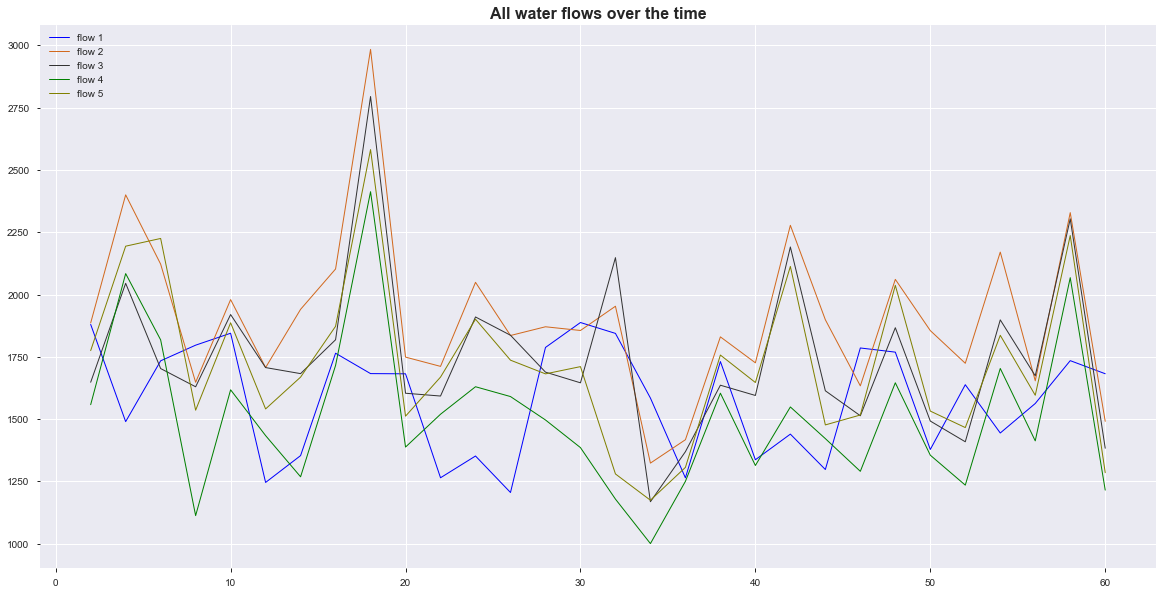

In [18]:
#visualize graphically all flow series
# multiple line plot
plt.figure(figsize=(20,10))
plt.title("All water flows over the time", fontsize=16, fontweight='bold')
plt.plot( 'tempo(h)', 'x1', data=df, marker='', color='blue', linewidth=1, label="flow 1")
plt.plot( 'tempo(h)', 'x2', data=df, marker='', color='chocolate', linewidth=1, label="flow 2")
plt.plot( 'tempo(h)', 'x3', data=df, marker='', color='#333333', linewidth=1, label="flow 3")
plt.plot( 'tempo(h)', 'x4', data=df, marker='', color='green', linewidth=1,  label="flow 4")
plt.plot( 'tempo(h)', 'x5', data=df, marker='', color='olive', linewidth=1, label="flow 5")
plt.legend(loc=2)

## The Standard Deviation (SD) is a measure of how spread out numbers are. Its symbol is σ (the greek letter sigma). it is the square root of the Variance.
## Variance: The average of the squared differences from the Mean.

In [19]:
media = statistics.mean(theflow)
mediana = statistics.median(theflow)

desvio_padrao = statistics.stdev(theflow)
variance = statistics.variance(theflow)
int_conf = mean_confidence_interval(theflow)
print('[Water Flow] ', 'Confiança Interval 1',int_conf)
print('[Water Flow] Mean: ', media,' Median: ',mediana,' Standard deviation: ', desvio_padrao,' Variance: ', variance)

#import statsmodels.stats.api as sms
#int_conf= sms.DescrStatsW(theflow).tconfint_mean()
#print('[Water Flow] ', 'Confiança Interval 2',int_conf)

[Water Flow]  Confiança Interval 1 (1725.3012500736338, 1604.5308229038478, 1846.0716772434198)
[Water Flow] Mean:  1725.3012500736343  Median:  1675.4261709586958  Standard deviation:  323.42914398330726  Variance:  104606.41117777489


In [20]:
meanArray = [media for i in range(time.size)]
medianaArray = [mediana for i in range(time.size)]
ConfArray = [0 for i in range(len(int_conf))]

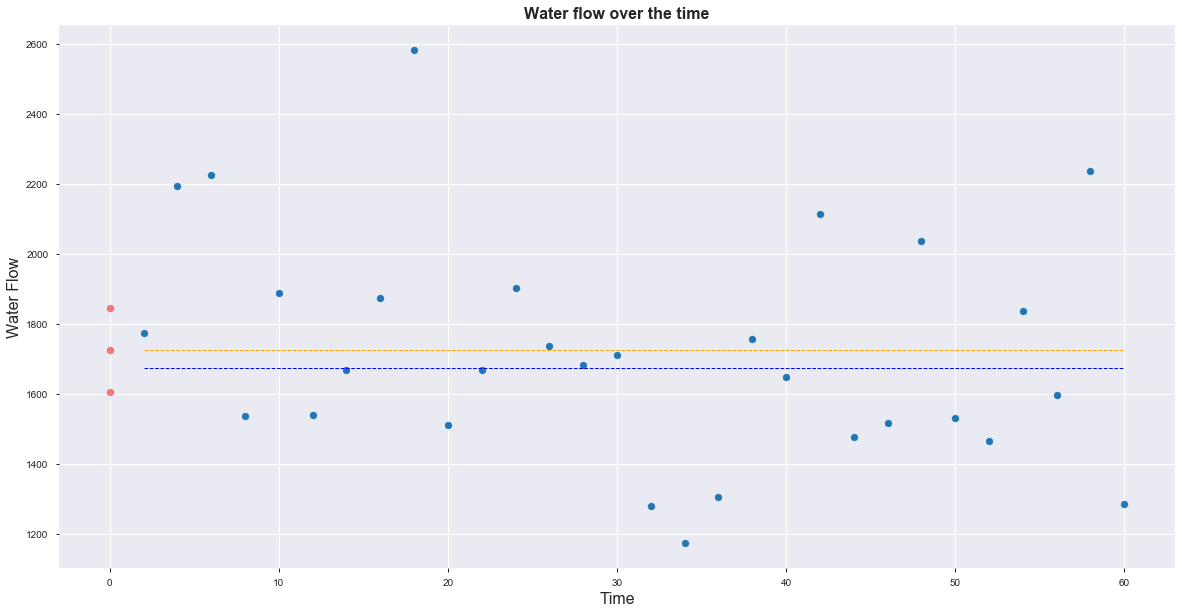

In [21]:
plt.figure(figsize=(20,10))
plt.scatter(ConfArray, int_conf, alpha=0.5,color="red")
plt.scatter(time, theflow)
plt.plot(time, meanArray,'--', linewidth=1,color='orange')
plt.plot(time, medianaArray,'--', linewidth=1,color='blue')
plt.xlabel('Time', fontsize=16)
plt.ylabel('Water Flow', fontsize=16)
plt.title("Water flow over the time", fontsize=16, fontweight='bold')
plt.show()

In [22]:
#http://colingorrie.github.io/outlier-detection.html#modified-z-score-method
outliers=[]
def outliers_iqr(ys):
    outliers=[]
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    
    for y in ys:
        if (y > upper_bound) | (y < lower_bound):
            outliers.append(y)
    
    return outliers
    #return np.where((ys > upper_bound) | (ys < lower_bound))

def outliers_modified_z_score(ys):
    outliers=[]
    threshold = 3.5

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    #modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
     #                    for y in ys]
    
    for y in ys:
        modified_z_scores = 0.6745 * (y - median_y) / median_absolute_deviation_y
        if (np.abs(modified_z_scores) > threshold):
            outliers.append(y)

    return outliers
    #return np.where(np.abs(modified_z_scores) > threshold)

    
def outliers_z_score(data_1):
    outliers=[]
    threshold=2
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [23]:
#outliers detected by IQR threshold
outliers = outliers_iqr(theflow)
outliers

[2581.947993590931]

In [24]:
#outliers detected by modified Z-Score threshold
outliers = outliers_modified_z_score(theflow)
outliers

[]

In [25]:
#outliers detected by Z-Score threshold
outliers = outliers_z_score(theflow)
outliers

[2581.947993590931]

In [26]:
df_outliers = df[df[flowName].isin(outliers)]
df_outliers

,tempo(h),x1,x2,x3,x4,x5
8,18,1682.947994,2983.947994,2794.947994,2412.947994,2581.947994


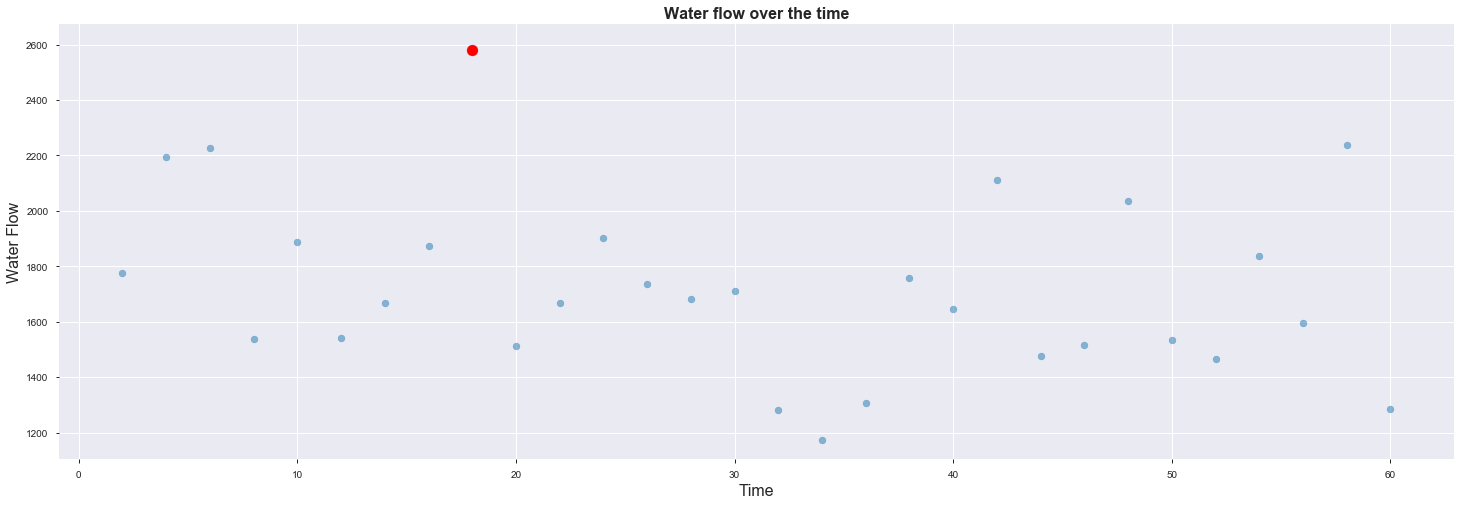

In [27]:
# Water Flow and highlited outliers
plt.figure(figsize=(25,8))
plt.scatter(df['tempo(h)'], df[flowName], alpha=0.5)
plt.scatter(df_outliers['tempo(h)'],  df_outliers[flowName], s=120, color="red")
plt.xlabel('Time', fontsize=16)
plt.ylabel('Water Flow', fontsize=16)
plt.title("Water flow over the time", fontsize=16, fontweight='bold')
plt.show()

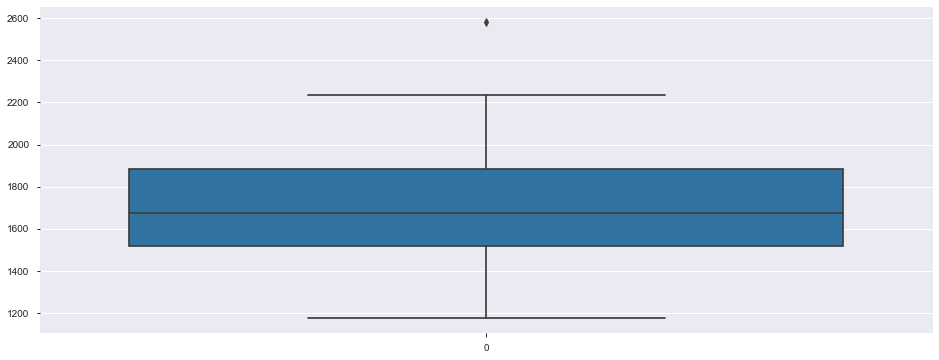

In [28]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=theflow)

In [29]:
dfRelations = df.drop(['tempo(h)'], axis=1)
profile=dfRelations.profile_report(style={'full_width':True})
profile

## Let´s work with Moving Avarage

In [30]:
#https://www.datacamp.com/community/tutorials/moving-averages-in-pandas
#Let´s work with Moving Avarage
#First of All - Simple Moving Average (SMA)
#Recreating a dataframe from time and selected flow to calculate moving flow manually and by the use of pandas in-built 
#rolling function  
dframe = pd.DataFrame(list(zip(time, theflow)), columns =['Time', 'Flow']) 
for i in range(0,dframe.shape[0]-2):
     dframe.loc[dframe.index[i+2],'SMA_3'] = np.round(((dframe.iloc[i,1]+ dframe.iloc[i+1,1] +dframe.iloc[i+2,1])/3),4)

dframe['pandas_SMA_3'] = dframe.iloc[:,1].rolling(window=3).mean()
dframe['pandas_SMA_4'] = dframe.iloc[:,1].rolling(window=4).mean()
dframe['pandas_SMA_10'] = dframe.iloc[:,1].rolling(window=10).mean()
dframe['EMA'] = dframe.iloc[:,1].ewm(span=40,adjust=False).mean()
dframe

,Time,Flow,SMA_3,pandas_SMA_3,pandas_SMA_4,pandas_SMA_10,EMA
0,2,1775.310492,NaN,NaN,NaN,NaN,1775.310492
1,4,2194.287362,NaN,NaN,NaN,NaN,1795.748388
2,6,2225.262285,2064.9534,2064.953380,NaN,NaN,1816.700286
3,8,1536.063261,1985.2043,1985.204303,1932.730850,NaN,1803.010675
4,10,1886.950593,1882.7587,1882.758713,1960.640875,NaN,1807.105305
5,12,1541.174277,1654.7294,1654.729377,1797.362604,NaN,1794.133060
6,14,1668.865411,1698.9968,1698.996760,1658.263386,NaN,1788.022443
7,16,1872.760661,1694.2668,1694.266783,1742.437736,NaN,1792.156014
8,18,2581.947994,2041.1914,2041.191355,1916.187086,NaN,1830.682452
9,20,1512.151086,1988.9532,1988.953247,1908.931288,1879.477342,1815.144337


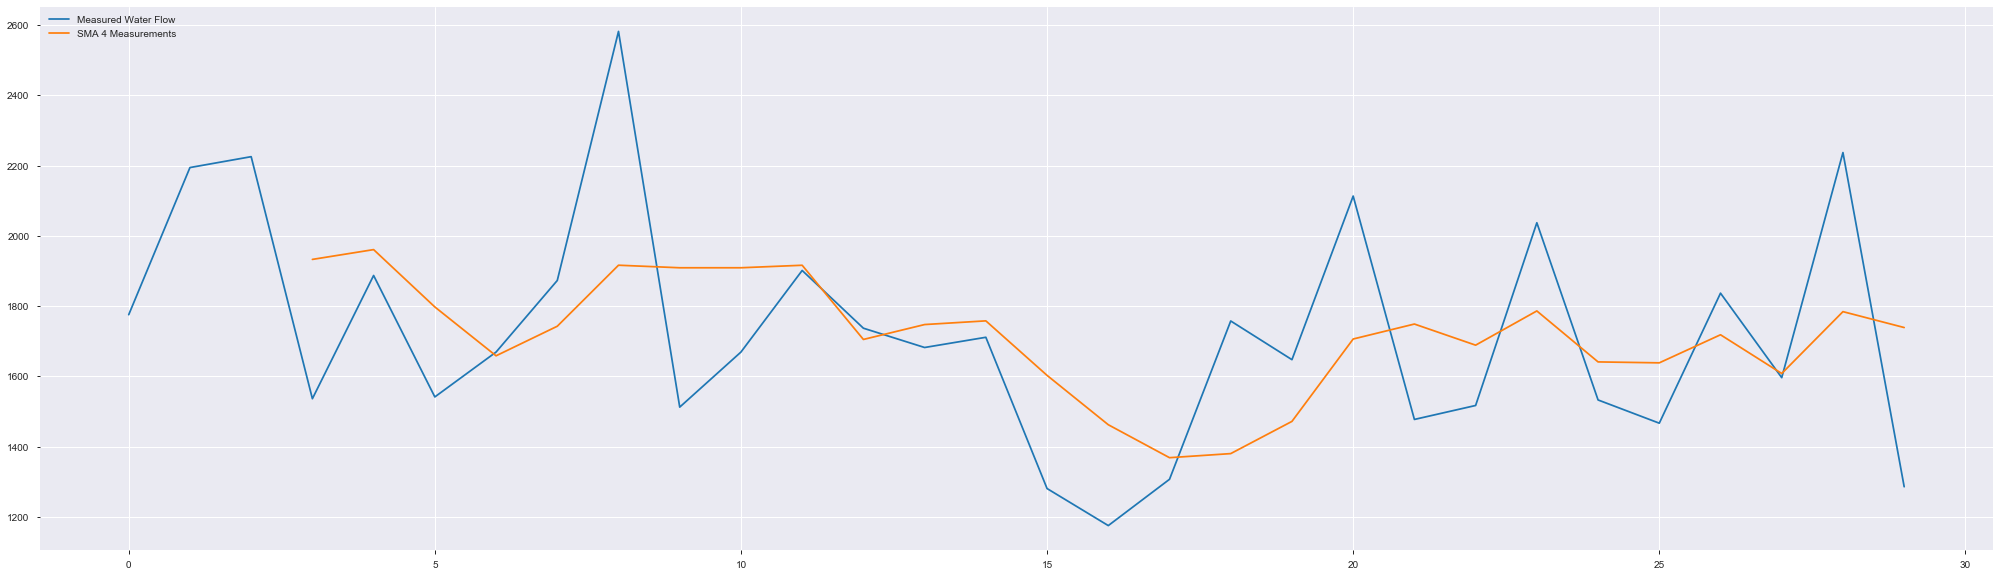

In [31]:
plt.figure(figsize=[35,10])
plt.grid(True)
plt.plot(dframe['Flow'],label='Measured Water Flow')
#plt.plot(dframe['SMA_3'],label='SMA 3 Measurements')
plt.plot(dframe['pandas_SMA_4'],label='SMA 4 Measurements')
#plt.plot(dframe['pandas_SMA_10'],label='SMA 10 Measurements')
#plt.plot(dframe['EMA'],label='EMA Measurements')
plt.legend(loc=2)

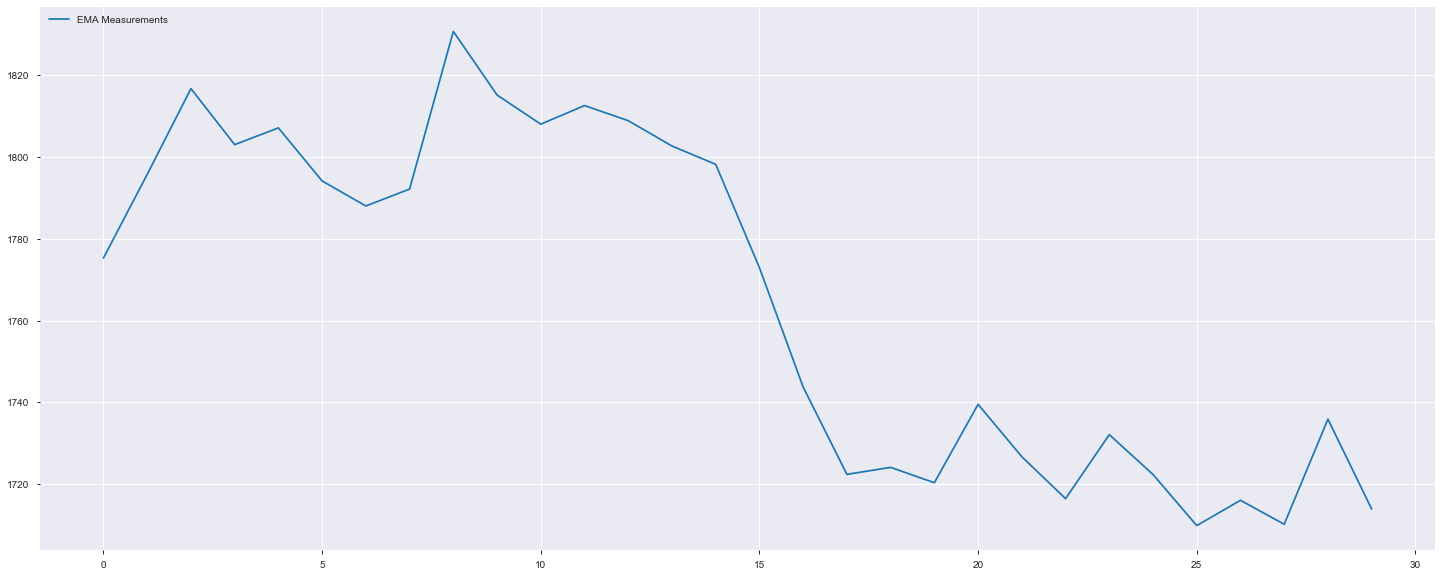

In [32]:
# Exponential Moving Average - EMA
#An exponentially weighted moving average reacts more significantly to recent valuees changes than a simple moving average
#(SMA), which applies an equal weight to all observations in the period.
plt.figure(figsize=[25,10])
plt.grid(True)
plt.plot(dframe['EMA'],label='EMA Measurements')
plt.legend(loc=2)

## Exercícios da Aula 2 (06/03/2020) com a mesma base de dados

## Implementar as matrizes R (correlação) e S (covariância). (1)
## Calcular a distância estatística de cada série de fluxos, e usá-la na identificação de outliers (2)
## Calcular as matrizes de covariância, correlação e distância estatística

Variance: The average of the squared differences from the Mean.

Covariance is a measure of how much two random variables vary together.

In [33]:
dfRelations = df.drop(['tempo(h)'], axis=1)

In [34]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr(method ='pearson') 
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [35]:
corr_features = correlation(dfRelations, 0.8)
print(corr_features)
print('correlated features: ', len(set(corr_features)) )

{'x3', 'x4', 'x5'}
correlated features:  3


In [36]:
covMatrix = np.cov(dfRelations, rowvar=False)
covMatrix

array([[ 48675.85027509,   9611.93460189,   9647.33642411,
          5179.91891961,  10072.24337011],
       [  9611.93460189, 105879.94996318,  94879.93799229,
         87543.00324641,  94551.77597277],
       [  9647.33642411,  94879.93799229, 101779.28349267,
         76393.14874679,  81388.16859959],
       [  5179.91891961,  87543.00324641,  76393.14874679,
         92160.02089745,  90663.07523302],
       [ 10072.24337011,  94551.77597277,  81388.16859959,
         90663.07523302, 104606.41117777]])

              x1             x2             x3            x4             x5
x1  48675.850275    9611.934602    9647.336424   5179.918920   10072.243370
x2   9611.934602  105879.949963   94879.937992  87543.003246   94551.775973
x3   9647.336424   94879.937992  101779.283493  76393.148747   81388.168600
x4   5179.918920   87543.003246   76393.148747  92160.020897   90663.075233
x5  10072.243370   94551.775973   81388.168600  90663.075233  104606.411178


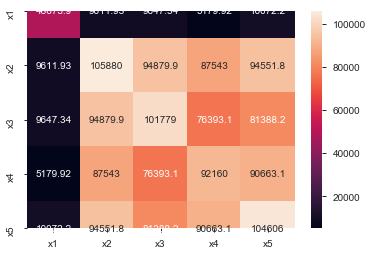

In [37]:
#Although the magnitude of the covariance matrix elements is not always easy to interpret 
#(because it depends on the magnitude of the individual observations which may be very different for different variables),
covMatrix = dfRelations.cov()
print (covMatrix)
sns.heatmap(covMatrix, annot=True, fmt='g')

In [38]:
dfRelations.corr(method ='pearson')

,x1,x2,x3,x4,x5
x1,1.000000,0.133890,0.137063,0.077338,0.141153
x2,0.133890,1.000000,0.913982,0.886224,0.898429
x3,0.137063,0.913982,1.000000,0.788776,0.788774
x4,0.077338,0.886224,0.788776,1.000000,0.923379
x5,0.141153,0.898429,0.788774,0.923379,1.000000


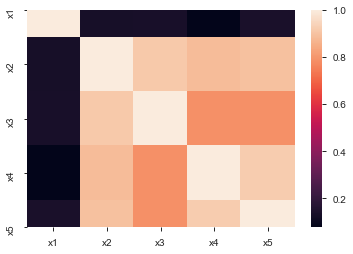

In [39]:
sns.heatmap(dfRelations.corr(method ='pearson'))

In [40]:
# Statistic Distance - https://www.machinelearningplus.com/statistics/mahalanobis-distance/
#https://www.kdnuggets.com/2017/08/comparing-distance-measurements-python-scipy.html
#https://stackoverflow.com/questions/46827580/multivariate-outlier-removal-with-mahalanobis-distance

 #   """Compute the Mahalanobis Distance between each row of x and the data  
  #  x    : vector or matrix of data with, say, p columns.
#    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
#    cov  : covariance matrix (p x p) of the distribution. 
# (SD)² = (xi - u)^T x S^-1 X (xi - u)


In [41]:
def MahalanobisDist(data, verbose=False):
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)
        if is_pos_def(inv_covariance_matrix):
            vars_mean = []
            for i in range(data.shape[0]):
                vars_mean.append(list(data.mean(axis=0)))
            diff = data - vars_mean
            md = []
            for i in range(len(diff)):
                md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))

            if verbose:
                print("Covariance Matrix:\n {}\n".format(covariance_matrix))
                print("Inverse of Covariance Matrix:\n {}\n".format(inv_covariance_matrix))
                print("Variables Mean Vector:\n {}\n".format(vars_mean))
                print("Variables - Variables Mean Vector:\n {}\n".format(diff))
                print("Mahalanobis Distance:\n {}\n".format(md))
            return md
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")


In [42]:
def MD_detectOutliers(data, extreme=False, verbose=False):
    MD = MahalanobisDist(data, verbose)
    # one popular way to specify the threshold
    #m = np.mean(MD)
    #t = 3. * m if extreme else 2. * m
    #outliers = []
    #for i in range(len(MD)):
    #    if MD[i] > t:
    #        outliers.append(i)  # index of the outlier
    #return np.array(outliers)

    # or according to the 68–95–99.7 rule
    std = np.std(MD)
    k = 3. * std if extreme else 2. * std
    m = np.mean(MD)
    up_t = m + k
    low_t = m - k
    outliers = []
    for i in range(len(MD)):
        if (MD[i] >= up_t) or (MD[i] <= low_t):
            outliers.append(i)  # index of the outlier
    return np.array(outliers)

In [43]:
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False

In [44]:
data = dfRelations.to_numpy()

In [45]:
print("data:\n {}\n".format(data))

data:
 [[1880.3104923  1886.3104923  1648.3104923  1558.3104923  1775.3104923 ]
 [1490.28736176 2400.28736176 2045.28736176 2084.28736176 2194.28736176]
 [1734.26228538 2122.26228538 1703.26228538 1818.26228538 2225.26228538]
 [1797.06326098 1648.06326098 1630.06326098 1113.06326098 1536.06326098]
 [1844.95059347 1979.95059347 1919.95059347 1617.95059347 1886.95059347]
 [1246.1742765  1707.1742765  1707.1742765  1434.1742765  1541.1742765 ]
 [1353.86541139 1940.86541139 1682.86541139 1268.86541139 1668.86541139]
 [1764.76066089 2102.76066089 1818.76066089 1715.76066089 1872.76066089]
 [1682.94799359 2983.94799359 2794.94799359 2412.94799359 2581.94799359]
 [1682.15108551 1749.15108551 1604.15108551 1388.15108551 1512.15108551]
 [1264.95402748 1711.95402748 1592.95402748 1519.95402748 1668.95402748]
 [1352.25659329 2049.25659329 1910.25659329 1630.25659329 1901.25659329]
 [1205.84910074 1835.84910074 1836.84910074 1590.84910074 1736.84910074]
 [1787.89831443 1870.89831443 1688.89831443 

In [46]:
outliers_indices = MD_detectOutliers(data, verbose=True)
print("Outliers Indices: {}\n".format(outliers_indices))

Covariance Matrix:
 [[ 48675.85027509   9611.93460189   9647.33642411   5179.91891961
   10072.24337011]
 [  9611.93460189 105879.94996318  94879.93799229  87543.00324641
   94551.77597277]
 [  9647.33642411  94879.93799229 101779.28349267  76393.14874679
   81388.16859959]
 [  5179.91891961  87543.00324641  76393.14874679  92160.02089745
   90663.07523302]
 [ 10072.24337011  94551.77597277  81388.16859959  90663.07523302
  104606.41117777]]

Inverse of Covariance Matrix:
 [[ 2.15228954e-05 -5.60167291e-07 -1.70622525e-06  6.59137585e-06
  -5.95132629e-06]
 [-5.60167291e-07  1.22454692e-04 -6.43686481e-05 -2.28440743e-05
  -4.07499506e-05]
 [-1.70622525e-06 -6.43686481e-05  6.18510213e-05 -5.89011095e-07
   1.07337180e-05]
 [ 6.59137585e-06 -2.28440743e-05 -5.89011095e-07  8.50144594e-05
  -5.32106577e-05]
 [-5.95132629e-06 -4.07499506e-05  1.07337180e-05 -5.32106577e-05
   8.47325467e-05]]

Variables Mean Vector:
 [[1582.4345834069672, 1906.4345834069672, 1749.8679167403004, 1509.4679

In [47]:
print("Outliers:")
for ii in outliers_indices:
    print(data[ii])
    #print(df.isin(data[ii]))
    df_out= df[df.isin(data[ii])]

Outliers:
[1844.29421864 1953.29421864 2148.29421864 1179.29421864 1280.29421864]


In [48]:
#normalize multivariable dataFrame 
normalized_df=(dfRelations-dfRelations.mean())/dfRelations.std()
normalized_df

,x1,x2,x3,x4,x5
0,1.350139,-0.061846,-0.318333,0.160889,0.154622
1,-0.417662,1.517716,0.925997,1.893478,1.450043
2,0.688168,0.663285,-0.146086,1.017181,1.545813
3,0.972817,-0.794031,-0.375529,-1.305772,-0.585099
4,1.189869,0.225931,0.533127,0.357346,0.499798
5,-1.524119,-0.612370,-0.133824,-0.248020,-0.569296
6,-1.036003,0.105813,-0.210020,-0.792554,-0.174492
7,0.826403,0.603353,0.215945,0.679536,0.455925
8,0.455583,3.311432,3.275819,2.976098,2.648638
9,0.451971,-0.483366,-0.456752,-0.399622,-0.659032


In [49]:
#convert dataframe to array
data = normalized_df.to_numpy()

In [50]:
outliers_indices = MD_detectOutliers(data, verbose=False)
print("Outliers Indices: {}\n".format(outliers_indices))

Outliers Indices: [15]



In [51]:
print("Outliers:")
for ii in outliers_indices:
    print(data[ii])
    #print(df.isin(data[ii]))
    df_out= df[df.isin(data[ii])]

Outliers:
[ 1.18689359  0.1440098   1.24887308 -1.08760499 -1.3759027 ]
